In [45]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
def reldata(df,forecast_col,forecast_out,test_size):
    label = df[forecast_col].shift(-forecast_out) #creating new column called label with the last 5 rows are nan
    X = np.array(df[[forecast_col]]) #creating the feature array
    X = preprocessing.scale(X) #processing the feature array
    X_lately = X[-forecast_out:] #creating the column i want to use later in the predicting method
    X = X[:-forecast_out] # X that will contain the training and testing
    label.dropna(inplace=True) #dropping na values
    y = np.array(label)  # assigning Y
    X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=test_size, random_state=0) #cross validation

    response = [X_train,X_test , Y_train, Y_test , X_lately]
    return response

In [43]:
df = pd.read_csv(r"C:\Users\Dell\Desktop\ProjectsPython\Stock market prediction\DOW.csv")
#df = df[df.symbol == "GOOG"]
#ax = df[df.symbol=='AAPL'].plot()

#df[df.symbol=='GOOG'].plot(ax=ax)

#df[df.symbol=='MSFT'].plot(ax=ax)

#plt.show()
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-01-04,55.820000,56.120998,53.650002,54.040001,52.908298,4852800
1,2021-01-05,54.139999,56.169998,54.000000,55.799999,54.631439,3112800
2,2021-01-06,56.950001,59.209999,56.549999,58.430000,57.206364,6208400
3,2021-01-07,59.000000,59.770000,58.105000,58.509998,57.284687,4437600
4,2021-01-08,58.369999,58.860001,57.750000,58.209999,56.990967,4063500
...,...,...,...,...,...,...,...
118,2021-06-23,64.000000,64.269997,63.099998,63.150002,63.150002,3254400
119,2021-06-24,63.779999,63.830002,62.759998,63.110001,63.110001,4253700
120,2021-06-25,63.250000,63.869999,63.110001,63.290001,63.290001,4258100
121,2021-06-28,63.299999,63.299999,62.169998,62.900002,62.900002,2727000


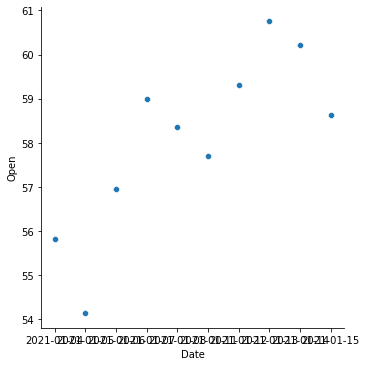

In [65]:
#f.head(20)


sns.relplot(x = "Date",y ="Open", data = df.head(10))

<AxesSubplot:xlabel='Date'>

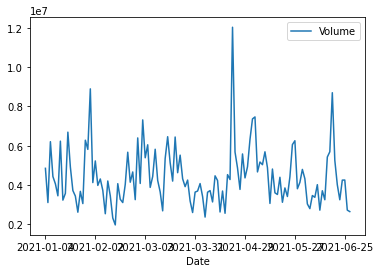

In [62]:
df.plot(x='Date', y='Volume')

In [33]:
forecast_col = 'Close'
forecast_out = 100
test_size = 0.2

In [34]:
X_train, X_test, Y_train, Y_test , X_lately = reldata(df,forecast_col,forecast_out,test_size); #calling the method were the cross validation and data preperation is in
learner = LinearRegression() #initializing linear regression model

learner.fit(X_train,Y_train) #training the linear regression model

LinearRegression()

In [35]:

score=learner.score(X_test,Y_test)#testing the linear regression model
forecast= learner.predict(X_lately) #set that will contain the forecasted data
response={}#creting json object
response['test_score']=score
response['forecast_set']=forecast

print(response)

{'test_score': -0.16834719880876992, 'forecast_set': array([67.24056007, 67.33576046, 66.68664325, 67.61271714, 67.61271714,
       68.02815562, 68.54744766, 68.36569571, 67.51751588, 69.96684978,
       71.77572395, 71.46414683, 72.82296553, 70.79771895, 69.03212272,
       70.96216458, 71.99209636, 71.57666134, 70.6678981 , 72.14788449,
       72.60659313, 71.58531451, 73.16915878, 73.36822486, 73.38553119,
       72.13923133, 72.38156669, 74.83090405, 73.71442157, 73.01337411,
       72.66717653, 70.27842691, 71.39490939, 72.4334978 , 73.08261502,
       73.00472095, 73.61921772, 73.03933794, 73.61056022, 73.6019036 ,
       73.61056022, 73.08261502, 72.39022072, 72.34694624, 72.90951623,
       72.49408121, 73.29898396, 73.58459726, 73.67980112, 73.56729007,
       71.77572395, 73.80096967, 70.43421504, 71.45549366, 71.53338773,
       71.92285892, 72.49408121, 73.14319583, 71.79303375, 73.56729007,
       75.01265601, 76.61381094, 77.45333674, 77.45333674, 77.18503669,
       77.0

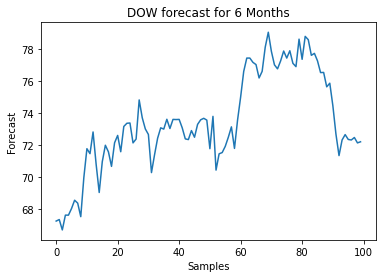

In [40]:
plt.plot(forecast)
plt.title('DOW forecast for 6 Months')
plt.ylabel('Forecast')
plt.xlabel('Samples')
plt.show()